In [19]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Taxi_Fare.csv')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [3]:
# Display the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data types of columns
print(df.dtypes)

# Unique values in categorical columns
print(df['unique_id'].unique())

  unique_id  amount      date_time_of_pickup  longitude_of_pickup  \
0   26:21.0     4.5  2009-06-15 17:26:21 UTC           -73.844311   
1   52:16.0    16.9  2010-01-05 16:52:16 UTC           -74.016048   
2   35:00.0     5.7  2011-08-18 00:35:00 UTC           -73.982738   
3   30:42.0     7.7  2012-04-21 04:30:42 UTC           -73.987130   
4   51:00.0     5.3  2010-03-09 07:51:00 UTC           -73.968095   

   latitude_of_pickup  longitude_of_dropoff  latitude_of_dropoff  \
0           40.721319            -73.841610            40.712278   
1           40.711303            -73.979268            40.782004   
2           40.761270            -73.991242            40.750562   
3           40.733143            -73.991567            40.758092   
4           40.768008            -73.956655            40.783762   

   no_of_passenger  
0                1  
1                1  
2                2  
3                1  
4                1  
             amount  longitude_of_pickup  latitude

In [4]:
# Handle missing values (if any)
df.dropna(inplace=True)

# Convert data types (if needed)
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

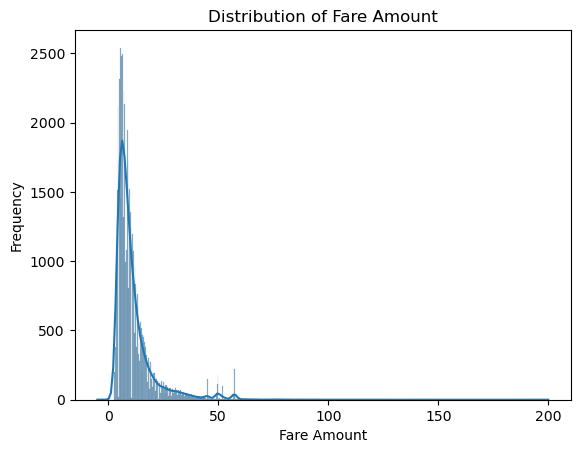

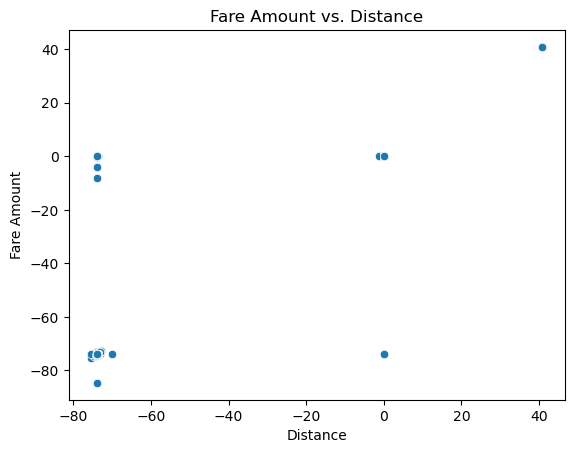

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of fare_amount
sns.histplot(df['amount'], kde=True)
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Fare Amount')
plt.show()

# Scatter plot of fare_amount vs. distance
sns.scatterplot(data=df, x='longitude_of_pickup', y='longitude_of_dropoff')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.title('Fare Amount vs. Distance')
plt.show()

In [29]:
# Extracting date and time features
df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])
df['latitude_of_dropoff'] = df['latitude_of_dropoff']
df['latitude_of_pickup	'] = df['date_time_of_pickup']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
X = df[['distance', 'pickup_hour']]
y = df['fare_amount']


KeyError: "['pickup_hour'] not in index"

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 92.95878927097276


In [35]:
X = df[['latitude_of_dropoff', 'latitude_of_pickup']]
y = df['amount']

In [36]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 92.95878927097276


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(X_test)



In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 6.039948597861389
Mean Squared Error: 92.95878927097276
Root Mean Squared Error: 9.64151384747088


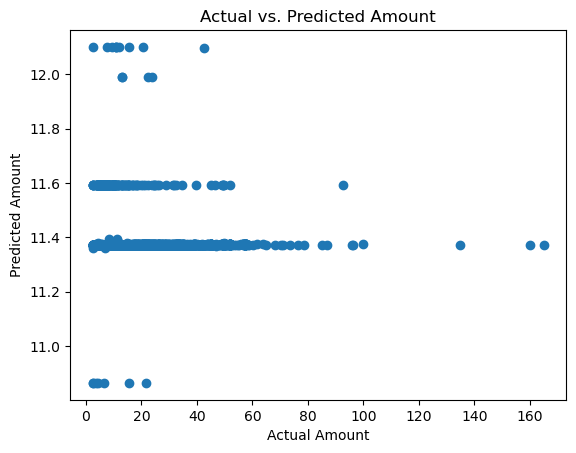

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Amount')
plt.ylabel('Predicted Amount')
plt.title('Actual vs. Predicted Amount')
plt.show()

In [22]:

coefficients = model.coef_
intercept = model.intercept_

print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [ 0.0124842  -0.01787264]
Intercept: 11.592145644408607


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

# Define base estimators
estimators = [
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42))
]

# Initialize stacking regressor
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Fit stacking regressor
stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=10,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=LinearRegression())

In [38]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)
print('Cross-Validation Scores:', scores)
print('Mean CV Score:', np.mean(scores))

Cross-Validation Scores: [-8.62686992e-07 -2.17458250e-05 -3.03529327e-05 -2.83548465e-04
 -6.30058484e-04]
Mean CV Score: -0.00019331367882720053


RandomForestRegressor(random_state=42)